# Energy Analysis

KATE expects your code to define variables with specific names that correspond to certain things we are interested in.

KATE will run your notebook from top to bottom and check the latest value of those variables, so make sure you don't overwrite them.

* Remember to uncomment the line assigning the variable to your answer and don't change the variable or function names.
* Use copies of the original or previous DataFrames to make sure you do not overwrite them by mistake.

You will find instructions below about how to define each variable.

Once you're happy with your code, upload your notebook to KATE to check your feedback.

Run the cell below first, to import `pandas`, and `matplotlib` `pyplot`. The `matplotlib` code isn't important, but prevents some unnecessary warnings from showing.

In [178]:
import pandas as pd

from matplotlib import pyplot as plt
from matplotlib.axes._axes import _log as matplotlib_axes_logger

matplotlib_axes_logger.setLevel('ERROR')

This assignment will focus on data visualisation using pandas. 

We have written some code below to do some initial collation and cleaning of the datasets we'll be working with - see if you can follow along and understand what each line is doing.

### Data collection

Run the following cell to import and concatenate the datasets, assigning the result to `data`:

In [179]:
df1 = pd.read_csv('data/heating_2018.csv')
df2 = pd.read_csv('data/hot_water_2018.csv')
df3 = pd.read_csv('data/catering_2018.csv')
data = pd.concat([df1, df2, df3], keys=['Heating', 'Hot Water', 'Catering']).reset_index(level=[0])

Running `data.head()` will show us the top of our DataFrame:

In [180]:
data.head()

,level_0,Sector,Sub-Sector,Electricity,Natural Gas,Oil,District Heating,Other
0,Heating,"Arts, leisure and community",Clubs & community centres,14,139,60,8.0,NaN
1,Heating,"Arts, leisure and community",Leisure Centres,5,159,7,18.0,NaN
2,Heating,"Arts, leisure and community",Museums,2,12,3,0.0,NaN
3,Heating,"Arts, leisure and community",Places of Worship,29,377,110,13.0,NaN
4,Heating,"Arts, leisure and community",Theatres,1,35,2,0.0,NaN


### Data processing

**Q1.** First of all, let's tidy up the `data` DataFrame:

- Use the `.rename()` method to change the name of the `level_0` column to `Use`
- Use the `.fillna()` method to update all `NaN` values to `0`
- Use the `astype()` method to convert the numerical columns to integers
- Create a new column `Total` which contains the sum of the other numerical columns

KATE will evaluate your updated version of `data` to check these changes have been made.


In [181]:
#add your code to update the `data` DataFrame below
data = data.rename(columns={"level_0": "Use"})

data = data.fillna(0)

convert_dict = {'Electricity': int,
                'Natural Gas': int,
                'Oil': int,
                'District Heating': int,
                'Other': int
                }
data = data.astype(convert_dict)

total_df = data.iloc[:, 3:].sum(axis=1)
data.insert(8, 'Total', total_df)

data


,Use,Sector,Sub-Sector,Electricity,Natural Gas,Oil,District Heating,Other,Total
0,Heating,"Arts, leisure and community",Clubs & community centres,14,139,60,8,0,221
1,Heating,"Arts, leisure and community",Leisure Centres,5,159,7,18,0,189
2,Heating,"Arts, leisure and community",Museums,2,12,3,0,0,17
3,Heating,"Arts, leisure and community",Places of Worship,29,377,110,13,0,529
4,Heating,"Arts, leisure and community",Theatres,1,35,2,0,0,38
...,...,...,...,...,...,...,...,...,...
31,Catering,Retail,Small shops,9,2,21,0,0,32
32,Catering,Storage,Cold Stores,0,0,0,0,0,0
33,Catering,Storage,Large Distribution Centres,3,4,1,0,0,8
34,Catering,Storage,Stores,1,0,0,0,0,1


### Data grouping

**Q2.** Create a new DataFrame called `ss`, using `.groupby()` to group `data` by `Sub-Sector`, which contains the `.sum()` for each of the numerical (energy type) columns for each group:

In [182]:
ss = data.groupby('Sub-Sector').sum()
ss

,Electricity,Natural Gas,Oil,District Heating,Other,Total
Sub-Sector,,,,,,
Cafes,55,44,25,0,0,124
Clubs & community centres,29,166,84,8,0,287
Cold Stores,0,2,0,0,0,2
Fire and Ambulance stations,5,75,9,1,0,90
Hairdressers,14,11,9,0,0,34
Health Centres,10,109,4,0,0,123
Hospitals,48,1243,3,34,0,1328
Hotels,67,244,160,0,76,547
Large Distribution Centres,14,117,33,0,2,166


**Q3.** Create a new DataFrame called `use`, using `.groupby()` to group `data` by `Use`, which contains the `.sum()` for each of the numerical (energy type) columns for each group:

In [183]:
use = data.groupby('Use').sum()
use


,Electricity,Natural Gas,Oil,District Heating,Other,Total
Use,,,,,,
Catering,758,587,800,0,0,2145
Heating,762,6044,1602,265,0,8673
Hot Water,160,801,257,17,109,1344


**Q4.** Create a new DataFrame called `sector`, using `.groupby()` to group `data` by `Sector`, and `.agg()` on the `Total` column such that the new DataFrame has columns for `sum`, `mean`, and `count` of the values in `Total`:

- Use the `sort_values()` method to sort the resulting DataFrame by `sum`, in *descending* order

- You may find [this documentation page](https://pandas.pydata.org/pandas-docs/version/0.23.1/generated/pandas.core.groupby.DataFrameGroupBy.agg.html) useful

In [184]:
sector = data.groupby('Sector')['Total'].agg(['sum', 'mean', 'count'])
sector.sort_values("sum", axis=0, ascending=False,
                   inplace=True)
sector


,sum,mean,count
Sector,,,
Hospitality,2371,197.583333,12
Education,1837,122.466667,15
Offices,1773,295.500000,6
Health,1488,165.333333,9
Retail,1402,77.888889,18
Storage,1340,111.666667,12
"Arts, leisure and community",1205,80.333333,15
Emergency Services,503,41.916667,12
Military,243,27.000000,9


*You may want to submit your notebook to KATE to ensure your `data`, `ss`, and `use` and `sector` DataFrames are as expected before moving on to the visualisations.*

### Data visualisation

**Q5.** Create a **histogram** from the `Electricity` column of `ss` using the `.plot()` method:
- The histogram should have 5 `bins`
- Assign the plot to the variable `elec_hist`
- Ensure your code cell starts with `plt.figure()`

*We need to execute `plt.figure()` before creating each new plot in the notebook, otherwise the properties of previous plots will be overwritten in memory and KATE will not evaluate them correctly.*

`plt.figure()`  
`elec_hist = ss.plot(....)`

<AxesSubplot:ylabel='Frequency'>

<Figure size 432x288 with 0 Axes>

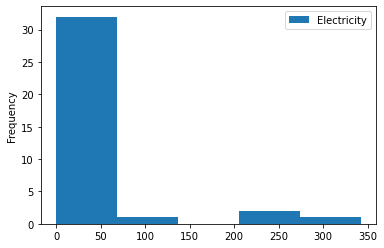

In [185]:
plt.figure()
elec_hist = ss.plot(y='Electricity', kind='hist', bins=5)
elec_hist

**Q6.** Create a **scatter plot** of `Natural Gas` vs `Total`, to see the relationship between the two values.

- Use the `.plot()` method on `ss`
- Have `Natural Gas` on the x-axis and `Total` on the y-axis
- Assign the plot to the variable `gas_total`
- Ensure your code cell starts with `plt.figure()`

<AxesSubplot:xlabel='Natural Gas', ylabel='Total'>

<Figure size 432x288 with 0 Axes>

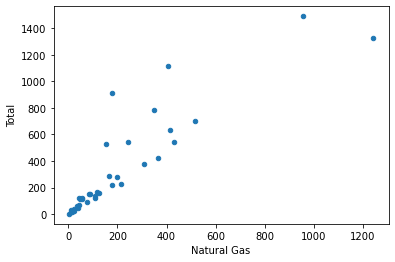

In [186]:
# gas_total/n#hide
plt.figure()
gas_total = ss.plot(x='Natural Gas', y='Total', kind='scatter')
gas_total


**Q7.** Create a **bar chart** of the `sum` column of the `sector` DataFrame using the `.plot()` method:

- Add a title of `Energy consumption by sector` to the plot
- Assign the plot to the variable `sector_sum`
- Ensure your code cell starts with `plt.figure()`

<AxesSubplot:title={'center':'Energy consumption by sector'}, xlabel='Sector'>

<Figure size 432x288 with 0 Axes>

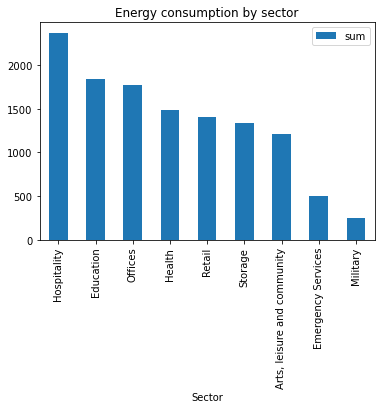

In [187]:
plt.figure()
sector_sum = sector.plot(y='sum', kind='bar', title='Energy consumption by sector')
sector_sum


**Q8.** Create a *horizontal* and *stacked* bar chart from the `use` DataFrame, using the `.plot()` method:

- Do not include the `Total` column values
- Assign the plot to the variable `use_type`
- Give it a `figsize` of `(12, 12)`
- You may find [this page](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.barh.html) useful
- Ensure your code cell starts with `plt.figure()`

<AxesSubplot:ylabel='Use'>

<Figure size 864x864 with 0 Axes>

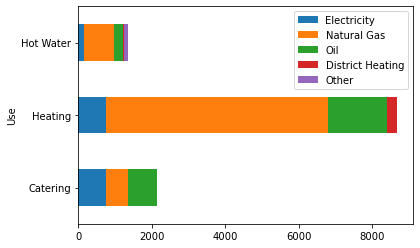

In [188]:
plt.figure(figsize=(12 , 12))
use_type = use.plot(y=["Electricity", "Natural Gas", "Oil", "District Heating", "Other"], kind='barh', stacked=True)
use_type